---
title: "K-Nearest implementation from scratch with Python"
date: "2025-01-17"
author: Anushka Dhiman
categories: [Machine Learning]
---
___

## What is KNN?

K-Nearest Neighbors (KNN) which is a simple, yet effective, algorithm used for classification (and regression) tasks. 

It is a classification algorithm that assigns a class label to a data point based on the class labels of its k nearest neighbors in the training set. It is a non-parametric algorithm, which means that it does not make any assumptions about the distribution of the data.

The KNN algorithm works as follows:

- Choose a value of k (the number of nearest neighbors to consider).
- For each data point in the test set, compute its distance to all data points in the training set.
- Select the k nearest neighbors based on their distances.
- Assign the class label that appears most frequently among the k nearest neighbors to the test point.

The distance between two data points can be computed using a distance metric such as Euclidean distance, Manhattan distance, or Minkowski distance. The choice of distance metric depends on the nature of the data and the problem at hand.

One important aspect of the KNN algorithm is the choice of the value of k. A small value of k will result in a more flexible decision boundary that can capture complex patterns in the data, but may also lead to overfitting. A large value of k will result in a smoother decision boundary that may not capture fine details in the data, but is less prone to overfitting. The value of k is typically chosen using cross-validation.

KNN can also be used for regression tasks, where the goal is to predict a continuous value instead of a class label. In this case, the predicted value for a test point is the average of the values of its k nearest neighbors in the training set.

## KNN Code Implementation using python

Here's an example implementation of a KNN classifier in python

In [1]:
from collections import Counter
import numpy as np

class KNN:
    def __init__(self, k=3, distance='euclidean'):
        self.k = k
        self.distance = distance
        
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
        
    def predict(self, X_test):
        y_pred = []
        for x in X_test:
            # Compute distances between the test point and all training points
            if self.distance == 'euclidean':
                distances = np.linalg.norm(self.X_train - x, axis=1)
            elif self.distance == 'manhattan':
                distances = np.sum(np.abs(self.X_train - x), axis=1)
            else:
                distances = np.power(np.sum(np.power(np.abs(self.X_train - x), self.distance), axis=1), 1/self.distance)
                
            # Select the k nearest neighbors
            nearest_indices = np.argsort(distances)[:self.k]
            nearest_labels = self.y_train[nearest_indices]
            
            # Assign the class label that appears most frequently among the k nearest neighbors
            label = Counter(nearest_labels).most_common(1)[0][0]
            y_pred.append(label)
        
        return np.array(y_pred)


Unlike many machine learning algorithms, k-NN doesn't need explicit training or model fitting—it's **a lazy learner** that simply stores the training data and uses it during prediction.

### Making Predictions: 

This method predicts the class labels for the test data based on the k-NN algorithm. Here’s how the prediction works:

**Loop over each test point:**

For each test point (x), the method computes the distances to all points in the training set (X_train).
Distance Calculation:

- If the distance parameter is 'euclidean', it uses the Euclidean distance to compute the distance between the test point and each training point. This is done using np.linalg.norm(self.X_train - x, axis=1), which calculates the L2 norm (Euclidean distance).
- If the distance parameter is 'manhattan', it uses the Manhattan distance (L1 norm) to compute the distance using np.sum(np.abs(self.X_train - x), axis=1).
- If a custom distance (like Minkowski) is provided, it calculates that distance using np.power(...).

**Find the k Nearest Neighbors:**

After calculating the distances, the np.argsort(distances) function is used to sort the distances in ascending order, and the first k indices (nearest neighbors) are selected using [:self.k].

**Majority Voting:**

The labels of the k nearest neighbors are retrieved from self.y_train[nearest_indices].
A majority vote is performed using the Counter class from the collections module, which counts the frequency of each class label among the k neighbors. The most common label is then assigned as the predicted label for the test point.

**Final Prediction:**

The predicted label is appended to the y_pred list, which stores the predicted labels for all the test points.

**Distance Calculation:**

- If the distance parameter is 'euclidean', it uses the Euclidean distance to compute the distance between the test point and each training point. This is done using np.linalg.norm(self.X_train - x, axis=1), which calculates the L2 norm (Euclidean distance).
- If the distance parameter is 'manhattan', it uses the Manhattan distance (L1 norm) to compute the distance using np.sum(np.abs(self.X_train - x), axis=1).
- If a custom distance (like Minkowski) is provided, it calculates that distance using np.power(...).

After iterating over all test points, the method returns the predicted labels as a numpy array

### Key Concepts:

- **Lazy Learning:** KNN doesn’t perform any training in the traditional sense (i.e., there is no model that is learned). Instead, it memorizes the training data and makes predictions during the testing phase by comparing new test data points with the stored training data.

- **Distance Metric:** The choice of distance metric is crucial. The default is Euclidean distance, which works well for most cases, but other distance metrics like Manhattan or Minkowski can be used depending on the problem.

- **k (Number of Neighbors):** The value of k determines how many nearest neighbors the algorithm will consider when making predictions. A small k may be noisy and sensitive to outliers, while a large k may smooth out the predictions but might lose the ability to capture the fine details of the data.

Let's test our code,

In [2]:
from collections import Counter
import numpy as np

# Creating a simple dataset
X_train = np.array([[1, 2], [2, 3], [3, 3], [6, 5], [7, 8], [8, 8]])
y_train = np.array([0, 0, 0, 1, 1, 1])

# Creating a KNN classifier object
knn = KNN(k=3, distance='euclidean')

# Fit the model with training data
knn.fit(X_train, y_train)

# Create a test sample
X_test = np.array([[3, 3], [7, 7]])

# Predict the class labels for the test sample
y_pred = knn.predict(X_test)

print("Predicted labels:", y_pred)


Predicted labels: [0 1]


Test Point 1 ([3, 3]): The nearest 3 neighbors are all from class 0, so it predicts 0.

Test Point 2 ([7, 7]): The nearest 3 neighbors are from class 1, so it predicts 1.

Now, we'll visualize the dataset and the KNN classification results.

Let's go through this step by step:

1. Load the Iris dataset
2. Split the data into training and test sets
3. Train the KNN classifier
4. Make predictions on the test data
5. Evaluate accuracy
6. Visualize the data and decision boundary (for a 2D projection)

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA  # To reduce dimensionality for visualization

# Load the iris dataset
iris = load_iris()

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)

# Create a KNN classifier with k=5 and euclidean distance
knn = KNN(k=5, distance='euclidean')

# Train the classifier on the training data
knn.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn.predict(X_test)

# Compute the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Visualization
# First, reduce the dimensionality to 2D using PCA for visualization
pca = PCA(n_components=2)
X_train_2d = pca.fit_transform(X_train)
X_test_2d = pca.transform(X_test)



Accuracy: 1.0


In [4]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the iris dataset
iris = load_iris()

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)

# Create a KNN classifier with k=5 and euclidean distance
knn = KNN(k=5, distance='euclidean')

# Train the classifier on the training data
knn.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn.predict(X_test)

# Compute the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 1.0


This may vary slightly based on how the model generalizes to the test data

## Visualization 

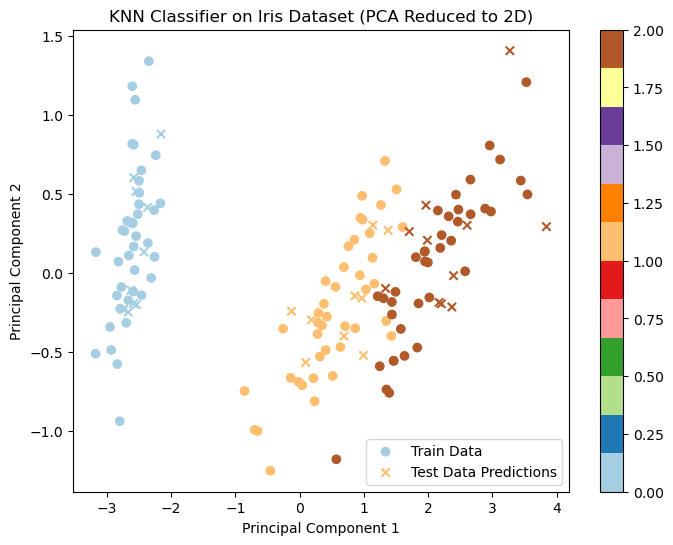

In [4]:
# Plot the training data
plt.figure(figsize=(8, 6))
plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=y_train, cmap=plt.cm.Paired, marker='o', label='Train Data')

# Plot the test data
plt.scatter(X_test_2d[:, 0], X_test_2d[:, 1], c=y_pred, cmap=plt.cm.Paired, marker='x', label='Test Data Predictions')

# Add title and labels
plt.title('KNN Classifier on Iris Dataset (PCA Reduced to 2D)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.colorbar()  # Add a color bar to represent different classes
plt.show()

Since the Iris dataset is 4-dimensional, it is reduced to 2 dimensions using Principal Component Analysis (PCA) for visualization purposes. PCA helps to visualize high-dimensional data in a 2D space while maintaining as much variance as possible.

X_train_2d and X_test_2d are the transformed 2D representations of the training and test data.

The matplotlib library is used to plot the 2D points. 

- Training Data: Circles represent the training data points, colored according to their class label.
- Test Data: Crosses represent the test data points, and their color reflects the predicted class labels based on the k-NN classifier.

The decision boundaries can be observed based on how the different classes are distributed in the 2D space.

The things to note here are:

- The plot helps us see how well the KNN classifier has classified the test data based on the training data.
- The PCA is used here to make the data 2D for visualization. However, the actual classification is done in the 4-dimensional feature space of the original Iris dataset.